In [ ]:
import pandas as pd
import numpy as np
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/Attack.csv")
df2 = pd.read_csv("/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/environmentMonitoring.csv")
df3 = pd.read_csv("/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/patientMonitoring.csv")

<ipython-input-3-ed7c25978be6>:1: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/Attack.csv")
<ipython-input-3-ed7c25978be6>:3: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/patientMonitoring.csv")


In [ ]:
df1.describe()

,frame.time_delta,frame.time_relative,frame.len,tcp.srcport,tcp.dstport,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,...,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label
count,80126.000000,80126.000000,80126.000000,80126.000000,80126.000000,80126.000000,80126.000000,8.012600e+04,80126.000000,80126.000000,...,80126.000000,80126.000000,80126.000000,80126.000000,80126.000000,80126.000000,80126.0,80126.0,80126.000000,80126.0
mean,0.005483,45.000738,281.172129,35633.730337,20841.751803,0.015455,224.751641,1.558369e+05,0.020605,0.020380,...,53.735317,2.011769,0.308364,0.001498,20.281220,0.092404,0.0,6.0,83.740109,1.0
std,0.216919,67.828988,481.186649,25332.316629,25344.442269,0.251808,482.274661,3.267726e+05,0.142059,0.141299,...,78.465575,1.711541,0.461821,0.038671,29.996273,0.600902,0.0,0.0,29.558518,0.0
min,0.000000,0.000000,54.000000,1883.000000,1883.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0,64.000000,1.0
25%,0.000001,7.257224,60.000000,1883.000000,1883.000000,0.000001,0.000000,7.010000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0,64.000000,1.0
50%,0.000015,25.400610,66.000000,54545.000000,1883.000000,0.000030,8.000000,1.263700e+04,0.000000,0.000000,...,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0,64.000000,1.0
75%,0.000098,53.717329,144.000000,54563.000000,54546.000000,0.000249,90.000000,3.597200e+04,0.000000,0.000000,...,164.000000,3.000000,1.000000,0.000000,65.000000,0.000000,0.0,6.0,128.000000,1.0
max,44.436313,374.597577,1514.000000,65471.000000,65471.000000,11.276017,1460.000000,1.712906e+06,1.000000,1.000000,...,692.000000,14.000000,1.000000,1.000000,66.000000,4.000000,0.0,6.0,128.000000,1.0


In [ ]:
df2.describe()

,frame.time_delta,frame.time_relative,frame.len,tcp.srcport,tcp.dstport,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,...,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label
count,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000,31758.000000,31758.0,31758.0,...,31758.000000,31758.000000,31758.000000,31758.0,31758.000000,31758.000000,31758.0,31758.0,31758.0,31758.0
mean,0.125325,985.308424,78.299515,28729.786322,12681.558096,2.605088,10.299515,1483.713710,0.0,0.0,...,239.631337,4.065369,0.248504,0.0,4.423830,0.005290,0.0,6.0,64.0,0.0
std,0.538998,571.907904,5.168694,17608.643713,16895.495691,1.967203,5.168694,2023.731246,0.0,0.0,...,495.084925,2.634356,0.432153,0.0,3.638251,0.145371,0.0,0.0,0.0,0.0
min,0.000000,0.000000,70.000000,1883.000000,1883.000000,0.000000,2.000000,1.000000,0.0,0.0,...,-55.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,6.0,64.0,0.0
25%,0.000017,489.819950,72.000000,1883.000000,1883.000000,0.000217,4.000000,39.500000,0.0,0.0,...,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.0,6.0,64.0,0.0
50%,0.000031,984.819487,80.000000,37361.000000,1883.000000,2.999633,12.000000,409.000000,0.0,0.0,...,0.000000,3.000000,0.000000,0.0,5.000000,0.000000,0.0,6.0,64.0,0.0
75%,0.000061,1479.827982,83.000000,41065.000000,34429.000000,4.996213,15.000000,2247.000000,0.0,0.0,...,175.000000,4.000000,0.000000,0.0,8.000000,0.000000,0.0,6.0,64.0,0.0
max,3.148110,2047.246210,105.000000,46547.000000,46547.000000,5.029132,37.000000,8302.000000,0.0,0.0,...,1999.000000,13.000000,1.000000,0.0,11.000000,4.000000,0.0,6.0,64.0,0.0


In [ ]:
df3.describe()

,frame.time_delta,frame.time_relative,frame.len,tcp.srcport,tcp.dstport,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,...,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label
count,76810.000000,76810.000000,76810.000000,76810.000000,76810.000000,76810.000000,76810.000000,76810.000000,76810.0,76810.0,...,76810.000000,76810.000000,76810.0,76810.0,76810.000000,76810.000000,76810.0,76810.0,76810.0,76810.0
mean,0.133703,2921.691253,79.308449,37652.780029,4098.876500,3.501738,11.308449,637.383244,0.0,0.0,...,63.800078,4.102044,0.0,0.0,5.568416,0.004166,0.0,6.0,64.0,0.0
std,0.464622,1891.546099,14.766326,9866.519362,8897.447631,9.752309,14.766326,3793.878933,0.0,0.0,...,59.996602,3.052625,0.0,0.0,4.027569,0.129025,0.0,0.0,0.0,0.0
min,0.000000,0.000000,70.000000,1883.000000,1883.000000,0.000000,2.000000,1.000000,0.0,0.0,...,-80.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,6.0,64.0,0.0
25%,0.000035,1314.960131,77.000000,35965.000000,1883.000000,1.995325,9.000000,51.000000,0.0,0.0,...,0.000000,3.000000,0.0,0.0,3.000000,0.000000,0.0,6.0,64.0,0.0
50%,0.000087,2712.962844,78.000000,38937.000000,1883.000000,1.999715,10.000000,99.000000,0.0,0.0,...,56.000000,3.000000,0.0,0.0,3.000000,0.000000,0.0,6.0,64.0,0.0
75%,0.000180,4479.037043,80.000000,42449.000000,1883.000000,2.002226,12.000000,165.000000,0.0,0.0,...,93.000000,3.000000,0.0,0.0,7.000000,0.000000,0.0,6.0,64.0,0.0
max,2.155548,6611.038212,1766.000000,46801.000000,46801.000000,60.037328,1698.000000,59658.000000,0.0,0.0,...,199.000000,13.000000,0.0,0.0,13.000000,4.000000,0.0,6.0,64.0,0.0


In [ ]:
df1.fillna(0 , inplace = True)
df2.fillna(0 , inplace = True)
df3.fillna(0 , inplace = True)

In [ ]:
df1.dropna(inplace = True)
df2.dropna(inplace = True)
df3.dropna(inplace = True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80126 entries, 0 to 80125
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frame.time_delta       80126 non-null  float64
 1   frame.time_relative    80126 non-null  float64
 2   frame.len              80126 non-null  int64  
 3   ip.src                 80126 non-null  object 
 4   ip.dst                 80126 non-null  object 
 5   tcp.srcport            80126 non-null  int64  
 6   tcp.dstport            80126 non-null  int64  
 7   tcp.flags              80126 non-null  object 
 8   tcp.time_delta         80126 non-null  float64
 9   tcp.len                80126 non-null  int64  
 10  tcp.ack                80126 non-null  int64  
 11  tcp.connection.fin     80126 non-null  float64
 12  tcp.connection.rst     80126 non-null  float64
 13  tcp.connection.sack    80126 non-null  float64
 14  tcp.connection.syn     80126 non-null  float64
 15  tc

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31758 entries, 0 to 31757
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frame.time_delta       31758 non-null  float64
 1   frame.time_relative    31758 non-null  float64
 2   frame.len              31758 non-null  int64  
 3   ip.src                 31758 non-null  object 
 4   ip.dst                 31758 non-null  object 
 5   tcp.srcport            31758 non-null  int64  
 6   tcp.dstport            31758 non-null  int64  
 7   tcp.flags              31758 non-null  object 
 8   tcp.time_delta         31758 non-null  float64
 9   tcp.len                31758 non-null  int64  
 10  tcp.ack                31758 non-null  int64  
 11  tcp.connection.fin     31758 non-null  float64
 12  tcp.connection.rst     31758 non-null  float64
 13  tcp.connection.sack    31758 non-null  float64
 14  tcp.connection.syn     31758 non-null  float64
 15  tc

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76810 entries, 0 to 76809
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frame.time_delta       76810 non-null  float64
 1   frame.time_relative    76810 non-null  float64
 2   frame.len              76810 non-null  int64  
 3   ip.src                 76810 non-null  object 
 4   ip.dst                 76810 non-null  object 
 5   tcp.srcport            76810 non-null  int64  
 6   tcp.dstport            76810 non-null  int64  
 7   tcp.flags              76810 non-null  object 
 8   tcp.time_delta         76810 non-null  float64
 9   tcp.len                76810 non-null  int64  
 10  tcp.ack                76810 non-null  int64  
 11  tcp.connection.fin     76810 non-null  float64
 12  tcp.connection.rst     76810 non-null  float64
 13  tcp.connection.sack    76810 non-null  float64
 14  tcp.connection.syn     76810 non-null  float64
 15  tc

## **Merging Datasets**

In [ ]:
# merging all three datasets
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [ ]:
df.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,10.16.120.44,10.16.120.72,56808,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
1,0.000052,0.000052,74,10.16.120.72,10.16.120.44,1883,56808,0x00000012,0.000052,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
2,0.000008,0.000060,74,10.16.120.44,10.16.120.72,56810,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
3,0.000012,0.000072,74,10.16.120.72,10.16.120.44,1883,56810,0x00000012,0.000012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
4,0.000003,0.000075,74,10.16.120.44,10.16.120.72,56812,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       188694 non-null  float64
 1   frame.time_relative    188694 non-null  float64
 2   frame.len              188694 non-null  int64  
 3   ip.src                 188694 non-null  object 
 4   ip.dst                 188694 non-null  object 
 5   tcp.srcport            188694 non-null  int64  
 6   tcp.dstport            188694 non-null  int64  
 7   tcp.flags              188694 non-null  object 
 8   tcp.time_delta         188694 non-null  float64
 9   tcp.len                188694 non-null  int64  
 10  tcp.ack                188694 non-null  int64  
 11  tcp.connection.fin     188694 non-null  float64
 12  tcp.connection.rst     188694 non-null  float64
 13  tcp.connection.sack    188694 non-null  float64
 14  tcp.connection.syn     188694 non-nu

In [ ]:
#saving merged dtaset to new file
df.to_csv('merged_dataset.csv', index=False)

In [ ]:
#checking for duplicates rows
df.drop_duplicates(inplace=True)

In [ ]:
#adding a column to indicate dataset original source
df1['source'] = 'dataset1'
df2['source'] = 'dataset2'
df3['source'] = 'dataset3'

merged_dataset = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

## **Feature Engineering**

In [ ]:
# Loading merged dataset
df = pd.read_csv('/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/merged_dataset.csv')

<ipython-input-18-36bdf6329772>:2: DtypeWarning: Columns (26,28,35,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/IoT Health care dataset - Copy/ICUDatasetProcessed/merged_dataset.csv')


In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136665 entries, 0 to 136664
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       136665 non-null  float64
 1   frame.time_relative    136665 non-null  float64
 2   frame.len              136665 non-null  int64  
 3   ip.src                 136665 non-null  object 
 4   ip.dst                 136665 non-null  object 
 5   tcp.srcport            136665 non-null  int64  
 6   tcp.dstport            136665 non-null  int64  
 7   tcp.flags              136665 non-null  object 
 8   tcp.time_delta         136665 non-null  float64
 9   tcp.len                136665 non-null  int64  
 10  tcp.ack                136665 non-null  int64  
 11  tcp.connection.fin     136665 non-null  float64
 12  tcp.connection.rst     136665 non-null  float64
 13  tcp.connection.sack    136665 non-null  float64
 14  tcp.connection.syn     136665 non-nu

,frame.time_delta,frame.time_relative,frame.len,tcp.srcport,tcp.dstport,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,...,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,label
count,136665.000000,136665.000000,136665.000000,136665.000000,136665.000000,136665.000000,136665.000000,136665.000000,136665.000000,136665.000000,...,136665.000000,136665.000000,136665.000000,136665.0,136665.000000,136665.000000,136665.0,136665.000000,136665.000000,136665.000000
mean,0.104351,1872.024207,111.714023,34917.765148,10001.883094,2.575018,45.597841,10659.906794,0.000059,0.000059,...,16.842235,3.627798,0.114192,0.0,7.813083,0.033747,0.0,5.999956,67.264976,0.205583
std,0.437803,1898.870910,199.740586,16783.134306,17615.768190,7.496270,201.808773,49566.207720,0.007651,0.007651,...,37.457360,2.876640,0.318045,0.0,14.487656,0.365854,0.0,0.016230,14.084027,0.404128
min,0.000000,0.000000,54.000000,1883.000000,1883.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000024,173.724785,74.000000,33571.000000,1883.000000,0.000509,4.000000,43.000000,0.000000,0.000000,...,2.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.0,6.000000,64.000000,0.000000
50%,0.000049,1310.246282,78.000000,38551.000000,1883.000000,1.998551,10.000000,115.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.0,3.000000,0.000000,0.0,6.000000,64.000000,0.000000
75%,0.000151,3023.027779,84.000000,44993.000000,1883.000000,2.004230,16.000000,762.000000,0.000000,0.000000,...,12.000000,3.000000,0.000000,0.0,8.000000,0.000000,0.0,6.000000,64.000000,0.000000
max,3.148110,6611.038212,1766.000000,59058.000000,59058.000000,60.037328,1698.000000,516883.000000,1.000000,1.000000,...,185.000000,13.000000,1.000000,0.0,66.000000,4.000000,0.0,6.000000,128.000000,1.000000


In [ ]:
#checking for missing values in merged dataset
df.isnull().sum()

,0
frame.time_delta,0
frame.time_relative,0
frame.len,0
ip.src,0
ip.dst,0
tcp.srcport,0
tcp.dstport,0
tcp.flags,0
tcp.time_delta,0
tcp.len,0


In [ ]:
#removing null values
df.fillna(0 , inplace = True)
df.dropna(inplace = True)

In [ ]:
#again checking for missing values in merged dataset
df.isnull().sum()

,0
frame.time_delta,0
frame.time_relative,0
frame.len,0
ip.src,0
ip.dst,0
tcp.srcport,0
tcp.dstport,0
tcp.flags,0
tcp.time_delta,0
tcp.len,0


In [ ]:
#to check non-numeric columns
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(np.object_)
#df_num
df_cat

,ip.src,ip.dst,tcp.flags,tcp.payload,tcp.checksum,mqtt.clientid,mqtt.conack.flags,mqtt.conflags,mqtt.hdrflags,mqtt.msg,mqtt.topic,class
0,10.16.120.44,10.16.120.72,0x00000002,0,0x00009a5d,0,0,0,0,0.0,0.0,Attack
1,10.16.120.72,10.16.120.44,0x00000012,0,0x00009941,0,0,0,0,0.0,0.0,Attack
2,10.16.120.44,10.16.120.72,0x00000002,0,0x0000bb2e,0,0,0,0,0.0,0.0,Attack
3,10.16.120.72,10.16.120.44,0x00000012,0,0x00000e6e,0,0,0,0,0.0,0.0,Attack
4,10.16.120.44,10.16.120.72,0x00000002,0,0x0000f752,0,0,0,0,0.0,0.0,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...
136660,10.5.126.165,10.5.126.56,0x00000018,30:08:00:03:45:43:47:31:37:35,0x00001118,0,0,0,0x00000030,175.0,ECG,patientMonitoring
136661,10.5.126.147,10.5.126.56,0x00000018,30:07:00:03:45:4d:47:35:39,0x00001105,0,0,0,0x00000030,59.0,EMG,patientMonitoring
136662,10.5.126.147,10.5.126.56,0x00000018,30:07:00:03:45:4d:47:35:33,0x00001105,0,0,0,0x00000030,53.0,EMG,patientMonitoring
136663,10.5.126.167,10.5.126.56,0x00000018,30:07:00:03:45:4d:47:35:31,0x00001119,0,0,0,0x00000030,51.0,EMG,patientMonitoring


In [ ]:
#Categorical to numerical
# Using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['mqtt.hdrflags','mqtt.msg']

for column in categorical_columns:
    # Convert the column to string type before encoding
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])

# Using One-Hot Encoding
dataset = pd.get_dummies(df, columns=['mqtt.hdrflags','mqtt.msg'], drop_first=True)

In [ ]:
#final checking of features to be non-numeric
df_cat = df.select_dtypes(np.object_)
df_cat

,ip.src,ip.dst,tcp.flags,tcp.payload,tcp.checksum,mqtt.clientid,mqtt.conack.flags,mqtt.conflags,mqtt.topic,class
0,10.16.120.44,10.16.120.72,0x00000002,0,0x00009a5d,0,0,0,0.0,Attack
1,10.16.120.72,10.16.120.44,0x00000012,0,0x00009941,0,0,0,0.0,Attack
2,10.16.120.44,10.16.120.72,0x00000002,0,0x0000bb2e,0,0,0,0.0,Attack
3,10.16.120.72,10.16.120.44,0x00000012,0,0x00000e6e,0,0,0,0.0,Attack
4,10.16.120.44,10.16.120.72,0x00000002,0,0x0000f752,0,0,0,0.0,Attack
...,...,...,...,...,...,...,...,...,...,...
136660,10.5.126.165,10.5.126.56,0x00000018,30:08:00:03:45:43:47:31:37:35,0x00001118,0,0,0,ECG,patientMonitoring
136661,10.5.126.147,10.5.126.56,0x00000018,30:07:00:03:45:4d:47:35:39,0x00001105,0,0,0,EMG,patientMonitoring
136662,10.5.126.147,10.5.126.56,0x00000018,30:07:00:03:45:4d:47:35:33,0x00001105,0,0,0,EMG,patientMonitoring
136663,10.5.126.167,10.5.126.56,0x00000018,30:07:00:03:45:4d:47:35:31,0x00001119,0,0,0,EMG,patientMonitoring


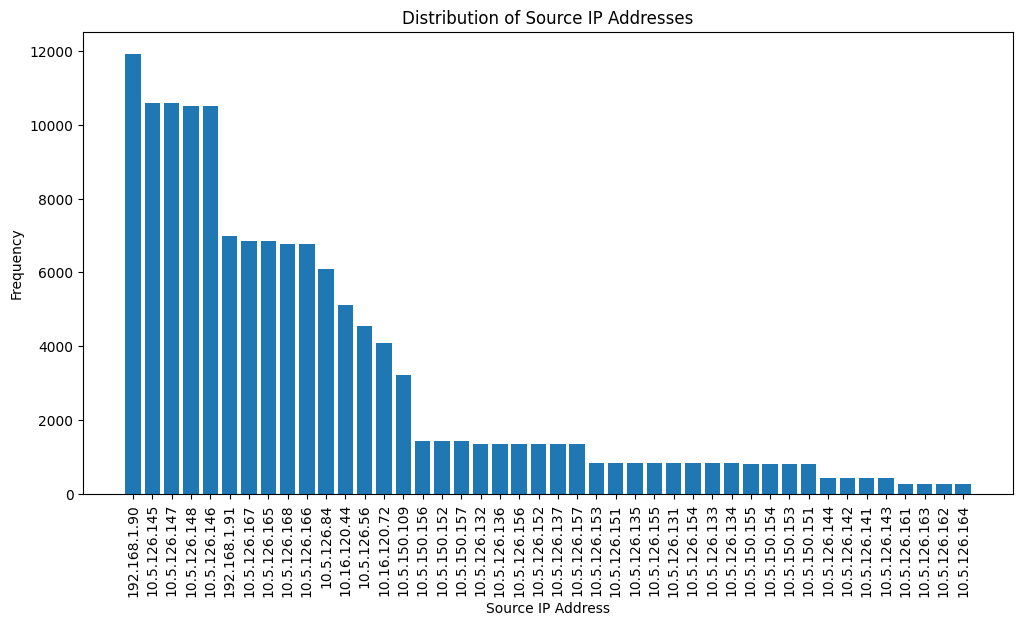

In [ ]:
# @title Distribution of Source IP Addresses

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
ip_src_counts = df['ip.src'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(ip_src_counts.index, ip_src_counts.values)
plt.xlabel('Source IP Address')
plt.ylabel('Frequency')
plt.title('Distribution of Source IP Addresses')
_ = plt.xticks(rotation=90)

In [ ]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# drop the column class and if needed we use label column instead
df.drop(columns=['class'], errors='ignore')
df.fillna(0 ,inplace=True)

                       frame.time_delta  frame.time_relative  frame.len  \
frame.time_delta               1.000000             0.043731  -0.038985   
frame.time_relative            0.043731             1.000000  -0.160603   
frame.len                     -0.038985            -0.160603   1.000000   
tcp.srcport                    0.092099             0.089732   0.210314   
tcp.dstport                   -0.109668            -0.271651  -0.094275   
tcp.time_delta                 0.018378             0.111667  -0.060229   
tcp.len                       -0.040798            -0.168126   0.999771   
tcp.ack                       -0.049604            -0.190585  -0.028016   
tcp.connection.fin            -0.001821            -0.007540  -0.001751   
tcp.connection.rst            -0.001823            -0.007540  -0.002211   
tcp.connection.sack           -0.020857            -0.086273  -0.016577   
tcp.connection.syn            -0.020820            -0.086273  -0.016501   
tcp.flags.ack            

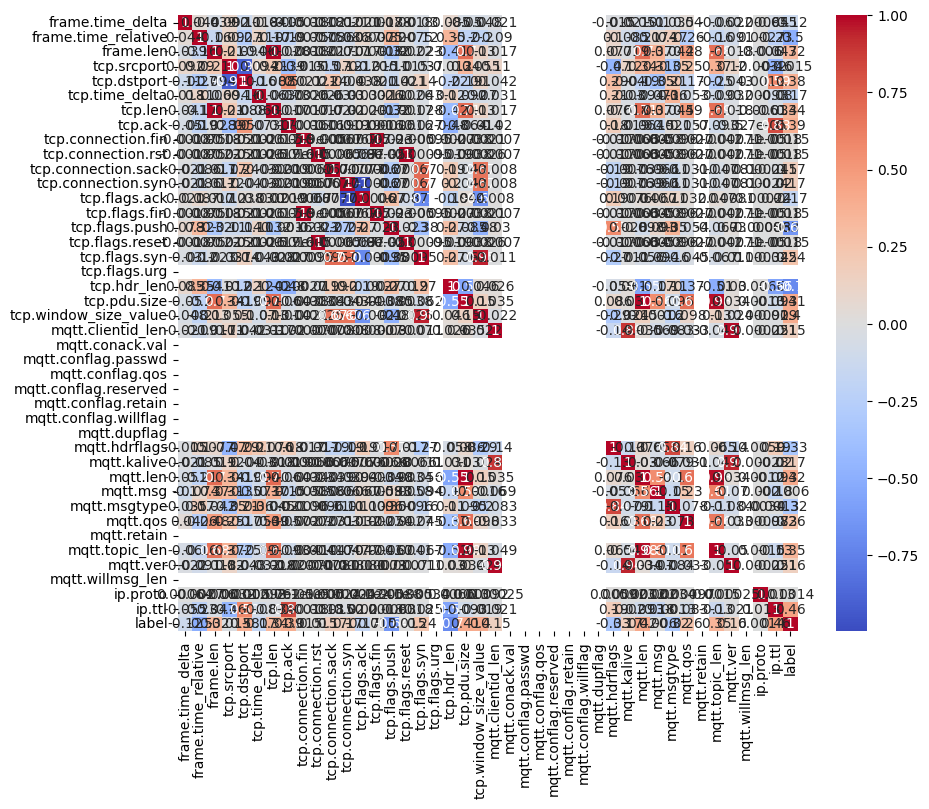

In [ ]:
#Heat map to check the features corr
import seaborn as sns
import matplotlib.pyplot as plt

#selecting only numerical valued column in datasetto find corelation
num_df = df.select_dtypes(include = np.number)
print(num_df.corr())
plt.figure(figsize=(10, 8))

#plotting Heatmap
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Model Implementation

In [ ]:
#Use models like Random Forest to identify important features
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df[numerical_features]
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


tcp.time_delta      3.805197e-01
mqtt.msgtype        1.985484e-01
mqtt.hdrflags       1.618171e-01
frame.time_delta    1.488955e-01
tcp.flags.push      7.230181e-02
mqtt.qos            3.591471e-02
tcp.flags.ack       1.170503e-03
mqtt.ver            8.321469e-04
tcp.flags.reset     1.396795e-09
mqtt.retain         0.000000e+00
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=100000)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=100, random_state=42)  # Increase max_iter if needed
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


In [ ]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=70, random_state=42)  # You can tune hyperparameters
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

In [ ]:
print("\nModel Comparison:")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

confusion matrix visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Trying to remove the overfitting**

In [ ]:
#checking data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#cross validation
#               helps to assess how well the model generalizes the unseen data

from sklearn.model_selection import cross_val_score

# Example for Random Forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=3, scoring='accuracy')  # 3-fold cross-validation
print("Cross-Validation Accuracy:", cv_scores.mean())

regularization model

In [ ]:
log_reg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,                # Limit depth of trees
    min_samples_split=5,         # Minimum samples per split
    max_features='sqrt',         # Limit features per split
    random_state=42
)
rf.fit(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

reducing feature set

In [ ]:
#removing irrelevent or highly correlated features

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Train model with reduced features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_new, y_train)

Add Noise

In [ ]:
#introduce noise to features to make the model robust

X_train += np.random.normal(0, 0.01, X_train.shape)

In [ ]:
!pip install scikit-learn

# Tune Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 100],
    'max_depth': [None, 5, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Evaluate with Precision and Recall

In [ ]:
#Accuracy alone isn’t enough. Use metrics like precision, recall, F1-score, and ROC-AUC to validate the model.

from sklearn.metrics import classification_report, roc_auc_score

# Evaluate predictions
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('knn', knn)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)
#printing Best Model
print('Ensembled Classification Report:\n', classification_report(y_test, predictions))